# **Unsupervised Learning**

The coding questions are independent of the theoretical questions.

In this assignment, we will build the simplest models for unsupervised learning for a linear neuron:

$$y = \sum\limits_{i=1}^{n} w_i x_i. \tag{1}$$


Here ${x_i}$ are input neurons and $w_i$ are the associated synaptic weights. Let's start with the assumption that synaptic weights are increased in proportion to the correlation between pre-synaptic and post-synaptic activity; synchonized firing $⟶$ stronger wiring: 


$$\Delta w_i = \tau <y,x_i>, \tag{2}$$

where $\Delta w_i$ is the change in the strength of synapse $w_i$ and the parameter $\tau > 0$ is a slow learning rate.



1) Suppose you have $m$ observations for each input $x_i$: $x_i^1,x_i^2,\cdots,x_i^m$. These observations are faster than the learning rate. After all the observations have occurred, we want to evaluate the synaptic weights. Show that the weights vector $\mathbf{w}^T={w_1,w_2, ..., w_n}$ is the solution to a differential equation of the form:

$$\gamma \frac{d \mathbf{w}}{d t}  = C \, \mathbf{w},$$
with $\gamma > 0$ and $C$ is the correlation matrix such that $C_{i,j} =  \sum\limits_{i=1}^{m} x_i^m x_j^m$.




## Answer here 

According to eq (1) & eq(2)
$$\Delta w_i =  \tau <y,x_i> = \tau <\sum\limits_{j=1}^{n} w_j x_j,x_i> $$

$$ = \tau \sum\limits_{j=1}^{n} w_j x_j x_i, $$

exchange i & j

$$\Delta w_i = \tau \sum\limits_{i=1}^{n} w_i x_i x_j, $$

for  $\mathbf{w}^T={w_1,w_2, ..., w_n}$ 

$$\Delta \mathbf{w} = \tau \sum\limits_{i=1}^{n}  \mathbf{w} x_i x_j = \tau \mathbf{w}\sum\limits_{i=1}^{n} x_i x_j $$

$$\frac{1}{\tau}\Delta \mathbf{w} = C_{i,j} \mathbf{w} $$

Here $$\frac{1}{\tau}=\gamma$$

$$\gamma \Delta \mathbf{w} = C_{i,j} \mathbf{w} $$

$$if \Delta w → 0$$:

$$\gamma \frac{d \mathbf{w}}{d t} = C w $$

2) The dataset "input.npy" contains presynaptic activity from two input neurons at random time points. Using the the rules (1) and (2), write a program that simulates the output $y$ and estimates the weights vector ${w_i}$. You can select the points in the data randomly and thus estimate the weights by stochastic gradient ascent. 

3) Run the program with 150 iterations (select 150 observations out of the 1000) and plot the weights and the data. What is the estimated vector ? Do you understand why ?



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving input.npy to input.npy


In [3]:
# Set random seed for reproducibility
np.random.seed(1)

# 2 inputs, 1 output 
inputdata = np.load('input.npy')
nb_samples = inputdata.shape[1]

n,m = inputdata.shape
lrate = 0.01 # This rate should work

In [4]:
def W_estimater(iter,lrate,m):
    weights = np.zeros([n,iter+1])
#  initialize the weights
    weights[:,0] = np.random.rand(2) 
    
    for i in range(iter):
        #sample index randomly from 0 ~ 1000 (observasion)
        ix = np.random.randint(low=0, high=m-1)
        y = np.dot(weights[:,i], inputdata[:,ix])
        weights[:,i+1] = weights[:,i] + lrate*y*inputdata[:,ix]
    return weights

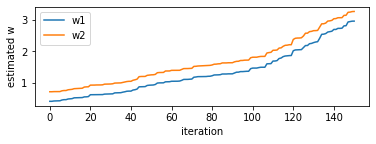

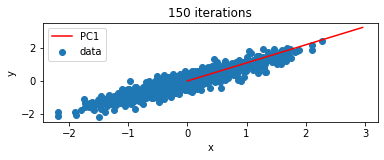

In [5]:
nb_samples = 150
weights = W_estimater(nb_samples,lrate,m)
plt.subplot(2, 1, 1)
plt.plot(weights[0], label = 'w1')
plt.plot(weights[1], label = 'w2')
plt.legend()
plt.xlabel("iteration")
plt.ylabel("estimated w")
plt.show()
plt.subplot(2, 1, 2)
plt.plot([0, weights[0, nb_samples-1]] , [0, weights[1, nb_samples-1]], color="r", label= 'PC1')
plt.scatter(inputdata[0], inputdata[1], label= 'data')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title('150 iterations')
plt.show()

#The red line represent the the eigenvector w.r.t the biggest eigenvalue of data matrix
#This is because the solusion fo differential equision (3) is w_1*exp(λ_1*t) + w_2*exp(λ_2*t)
# This means that the weight will increase to infinity.
# λ_1, λ_2 are the eigenvalues and w_1, w_2 are the eigenvectors.
# Therefore, the direction of estimated vector is first principle component axis.

4) Run the function with 300 and 500 iterations (same wights intialization and learning rate) and plot the results. Do you understand why the weights behave this way ? Is it biologically plausible that ?


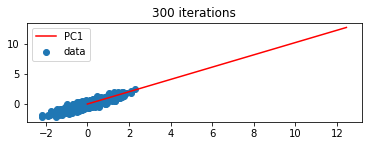

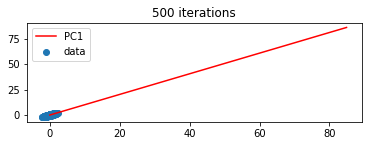

In [6]:
# Set random seed for reproducibility
np.random.seed(1)

# CODE and Answer here
nb_samples1 = 300
nb_samples2 = 500
weights1 = W_estimater(nb_samples1,lrate,m)
weights2 = W_estimater(nb_samples2,lrate,m)

plt.subplot(2, 1, 1)
plt.plot([0, weights1[0, nb_samples1-1]] , [0, weights1[1, nb_samples1-1]],color="r", label= 'PC1')
plt.scatter(inputdata[0], inputdata[1], label = 'data')
plt.legend()
plt.title('300 iterations')
plt.show()

plt.subplot(2, 1, 2)
plt.plot([0, weights2[0, nb_samples2-1]] , [0, weights2[1, nb_samples2-1]],color="r", label= 'PC1')
plt.scatter(inputdata[0], inputdata[1], label = 'data')
plt.legend()
plt.title('500 iterations')
plt.show()

# w value was exponentially increased
#This is because the solusion fo differential equision (3) is w_0*exp(λt)
# This means that the weight will increase to infinity and biologically no plausible.

From questions (1-4), you might noticed that the pure linear model will make some weights very large while reducing the others to zero. This is sometimes not desirable. Think of a layer 4 neuron taking inputs from two LGN neurons (each associated with an input from the left or the right eye). If one of the weights become very large compared to the other, we would reach a biologically implausible ocular dominance. One way to solve this problem is to constrain the growth of each weight in the following way:

$$w_i = \tau (<y,x_i> - \bar{w}_i y^2), \tag{3}$$

where $\bar{w}_i$ is the current weights. This way, we make sure the weights are bounded.


5) Update the program you wrote before to perform rule (3). Run the function with $2000$ iterations. Comment.

In [7]:
def W_estimater_new(nb_samples,lrate,m):
    weights = np.zeros([n,nb_samples+1])
    
#  initialize the weights
    weights[:,0] = np.random.rand(2)
    
    for i in range(nb_samples):
        #sample index randomly from 0 ~ 1000 (observasion)
        ix = np.random.randint(low=0, high=m-1)
        y = np.dot(weights[:,i], inputdata[:,ix])
        weights[:,i+1] = weights[:,i] + lrate*(y*inputdata[:,ix] - weights[:,i]*y**2)
    return weights

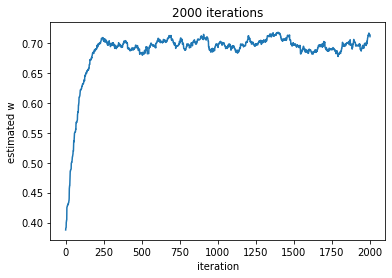

In [8]:
nb_samples = 2000
weights_new = W_estimater_new(2000,lrate,m)

plt.plot(weights_new[0])
plt.xlabel("iteration")
plt.ylabel("estimated w")
plt.title('2000 iterations')
plt.show()

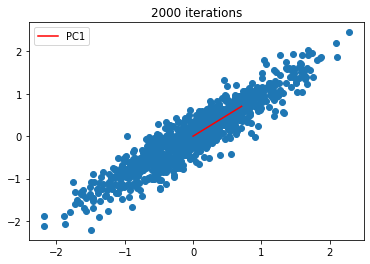

In [9]:
plt.scatter(inputdata[0], inputdata[1])
plt.plot([0, weights_new[0, -1]] , [0, weights_new[1, -1]], color="r", label='PC1')
plt.legend()
plt.title('2000 iterations')
plt.show()

Let's consider the case of multipe linear neurons each following rule (1):

$$y_j = \sum\limits_{i=1}^{n} w_{ij} x_i. \tag{4}$$

One method to estimate the weights is by generalizing rule (3) in the following way:

$$w_{ij} = \tau (<y_j,x_i> -  y_j \sum\limits_{k \leq j}\bar{w}_{i,k} \, y_k), \tag{5}$$

For the first output neuron, this rule is the same as rule (3). The following weights are updated by taking the residuals from previous weights.

6) Update your program in order to take into account multiple neurons following rule (5). Run the program with two output neurons using the same data and plot the weights. 

(This algorithm might have trouble converging. Use $20000$ iterations and initialize the weights randomly like in the other questions)


In [83]:
# Set random seed for reproducibility
np.random.seed(1)

# CODE and Answer here
# def W_estimater_new(iter,lrate,m):

def W_estimater_final(nb_samples,lrate,m):
    weights = np.zeros([n,nb_samples+1])
    y = np.zeros([nb_samples+1])

    #  initialize the weights
    weights = np.random.rand(2,n) 
    w = np.random.rand(nb_samples,2,n) 

    for s in range(nb_samples):
        #sample index randomly from 0 ~ 1000 (observasion)
        ix = np.random.randint(low=0, high=m-1)
        y = np.dot(weights, inputdata[:,ix])
        for i in range(2):
            for j in range(n):
              SUM = 0
              for k in range(j):
                SUM = SUM + weights[i, k]*y[k]
              weights[i, j] = weights[i, j] + lrate*(y[j]*inputdata[i,ix] - y[j]*SUM)
              w[ix, i, j] = weights[i, j]
    return w

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


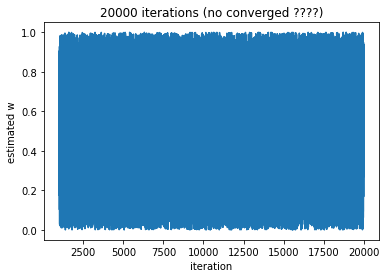

In [95]:
nb_samples = 20000
wf = W_estimater_final(nb_samples,lrate,m)

plt.plot(wf[:,1,0])
plt.xlabel("iteration")
plt.ylabel("estimated w")
plt.title('20000 iterations (no converged ????)')
plt.show()

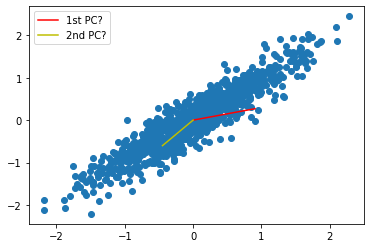

In [96]:
plt.scatter(inputdata[0], inputdata[1])
# w_norm = np.linalg.norm(w[-1], axis=0)

plt.plot([0, wf[-1,0,0]], [0, wf[-1,1,0]], color="r", label="1st PC?")
plt.plot([0, -wf[-1,0,1]], [0, -wf[-1,1,1]], color="y", label="2nd PC?")
plt.legend()
plt.show()